In [2]:

############################ For regression: f_regression, mutual_info_regression
############################ For classification: chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif, mutual_info_classif, mutual_info_regression
from time import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, classification_report, f1_score, plot_roc_curve, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('cancer.csv')
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


<AxesSubplot:>

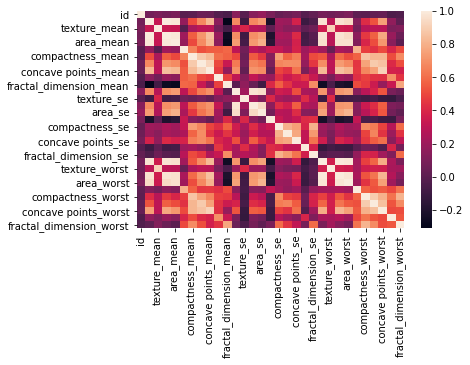

In [4]:
sns.heatmap(df.corr())

In [5]:
df['diagnosis'].replace(['M','B'],[1,0], inplace=True)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [6]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
Y = df.iloc[:, 31].values
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [8]:
X = df.iloc[:, :31].values
print(X)

[[8.4230200e+05 1.7990000e+01 1.0380000e+01 ... 2.6540000e-01
  4.6010000e-01 1.1890000e-01]
 [8.4251700e+05 2.0570000e+01 1.7770000e+01 ... 1.8600000e-01
  2.7500000e-01 8.9020000e-02]
 [8.4300903e+07 1.9690000e+01 2.1250000e+01 ... 2.4300000e-01
  3.6130000e-01 8.7580000e-02]
 ...
 [9.2695400e+05 1.6600000e+01 2.8080000e+01 ... 1.4180000e-01
  2.2180000e-01 7.8200000e-02]
 [9.2724100e+05 2.0600000e+01 2.9330000e+01 ... 2.6500000e-01
  4.0870000e-01 1.2400000e-01]
 [9.2751000e+04 7.7600000e+00 2.4540000e+01 ... 0.0000000e+00
  2.8710000e-01 7.0390000e-02]]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))

(455, 31)
(114, 31)
(455,)
(114,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(455, 31)
(114, 31)


In [12]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [13]:
lr.coef_

array([[-1.57686872e-10, -2.50322149e-16, -6.88975928e-16,
        -1.36326194e-15,  1.53154552e-14, -4.19903266e-18,
         7.34172158e-19,  6.40884878e-18,  3.50646308e-18,
        -8.00774768e-18, -3.48754400e-18,  9.72036319e-18,
        -6.67715241e-17,  7.09213336e-17,  2.88676153e-15,
        -4.22542669e-19, -4.28678574e-19, -3.63407606e-19,
        -1.57539633e-19, -1.12806501e-18, -1.86623053e-19,
        -1.27700047e-16, -8.18959659e-16, -5.22353264e-16,
         3.71438031e-14, -5.19379845e-18,  5.05951207e-18,
         1.31960628e-17,  4.43373885e-18, -1.02528721e-17,
        -3.46834053e-18]])

# Y = B0 + B1X1 + B2X2+............+B31X31
# no of columns 31
# coefficients 31
# Beta0 = 0.21340652,  Beta1 = 0.42474766,  Beta2 = 0.41003318,  0.3857563 ,  0.46057766,
#  0.01591622, -0.5274524 ,  0.79462345,  1.13652457, -0.23377215,
# -0.05797617,  1.28804102, -0.16761233,  0.62210769,  0.90554228,
#  0.21231162, -0.69390044, -0.19099693,  0.31154038, -0.46438409,
# -0.65072567,  0.86505766,  1.32315846,  0.57266121,  0.83329411,
#  0.60115414, -0.00463997,  0.95613535,  0.78612981,  1.18444572,
#  Beta31 = 0.17182771


In [14]:
Y_Pred_train = lr.predict(X_train)
Y_Pred_test = lr.predict(X_test)

In [15]:
print(Y_Pred_train.shape)
print(Y_Pred_test.shape)

(455,)
(114,)


In [16]:
acc_Score_train =  accuracy_score(Y_train,Y_Pred_train)
acc_Score_test = accuracy_score(Y_test,Y_Pred_test)
print("TRAIN SCORE : ", acc_Score_train)
print("TEST SCORE : ", acc_Score_test)

TRAIN SCORE :  0.6285714285714286
TEST SCORE :  0.6228070175438597


In [17]:
cmTrain  = confusion_matrix(Y_train, Y_Pred_train)
print(cmTrain)

[[286   0]
 [169   0]]


In [18]:
cmTest =  confusion_matrix(Y_test, Y_Pred_test)
cmTest

array([[71,  0],
       [43,  0]])

In [19]:
classifyTestReport = classification_report(Y_test, Y_Pred_test)
print(classifyTestReport)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
classifyTrainReport = classification_report(Y_train, Y_Pred_train)
print(classifyTrainReport)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       286
           1       0.00      0.00      0.00       169

    accuracy                           0.63       455
   macro avg       0.31      0.50      0.39       455
weighted avg       0.40      0.63      0.49       455



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# TEST DATA GETTING TPR AND FPR WITH ROC_CURVE FUNCTION
Y_PredProba_test = lr.predict_proba(X_test)

In [22]:
fprTest,tprTest,thresholdTest = roc_curve(Y_test, Y_PredProba_test[:,1], pos_label=1)
print(fprTest)
print(tprTest)
print(thresholdTest)

[0.         0.         0.01408451 0.01408451 0.05633803 0.05633803
 0.12676056 0.12676056 0.18309859 0.18309859 0.1971831  0.1971831
 0.22535211 0.22535211 0.26760563 0.26760563 0.35211268 0.35211268
 0.43661972 0.43661972 0.49295775 0.49295775 0.53521127 0.53521127
 0.64788732 0.64788732 0.66197183 0.66197183 0.69014085 0.69014085
 0.73239437 0.73239437 0.78873239 0.78873239 0.83098592 0.83098592
 0.84507042 0.84507042 0.87323944 0.87323944 0.88732394 0.88732394
 0.90140845 0.90140845 0.92957746 0.92957746 1.        ]
[0.         0.02325581 0.02325581 0.04651163 0.04651163 0.23255814
 0.23255814 0.25581395 0.25581395 0.27906977 0.27906977 0.30232558
 0.30232558 0.39534884 0.39534884 0.41860465 0.41860465 0.44186047
 0.44186047 0.46511628 0.46511628 0.48837209 0.48837209 0.51162791
 0.51162791 0.60465116 0.60465116 0.65116279 0.65116279 0.69767442
 0.69767442 0.72093023 0.72093023 0.74418605 0.74418605 0.76744186
 0.76744186 0.79069767 0.79069767 0.88372093 0.88372093 0.93023256
 0.930

In [23]:
# TRAIN DATA GETTING TPR AND FPR WITH ROC_CURVE FUNCTION
Y_PredProba_train = lr.predict_proba(X_train)

In [24]:
fprTrain,tprTrain,thresholdTrain = roc_curve(Y_train, Y_PredProba_train[:,1], pos_label=1)

In [25]:
print(fprTrain)
print(tprTrain)
print(thresholdTrain)

[0.         0.0034965  0.01048951 0.01048951 0.01398601 0.01398601
 0.02097902 0.02097902 0.02797203 0.02797203 0.04195804 0.04195804
 0.05594406 0.05594406 0.06293706 0.06293706 0.08041958 0.08041958
 0.08391608 0.08391608 0.1013986  0.1013986  0.11538462 0.11538462
 0.11888112 0.11888112 0.14685315 0.14685315 0.15384615 0.15384615
 0.16083916 0.16083916 0.16783217 0.16783217 0.18881119 0.18881119
 0.19230769 0.19230769 0.1993007  0.1993007  0.2027972  0.2027972
 0.20979021 0.20979021 0.21678322 0.21678322 0.22027972 0.22027972
 0.22727273 0.22727273 0.23426573 0.23426573 0.25524476 0.25524476
 0.25874126 0.25874126 0.26223776 0.26223776 0.26923077 0.26923077
 0.27622378 0.27622378 0.27972028 0.27972028 0.28321678 0.28321678
 0.28671329 0.28671329 0.29020979 0.29020979 0.2972028  0.2972028
 0.30769231 0.30769231 0.32517483 0.32517483 0.33216783 0.33216783
 0.36363636 0.36363636 0.37062937 0.37062937 0.37412587 0.37412587
 0.37762238 0.37762238 0.38461538 0.38461538 0.4020979  0.402097

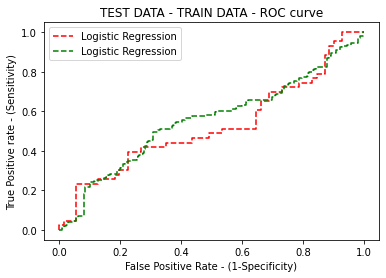

In [26]:
#plot roc curves
plt.plot(fprTest, tprTest, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fprTrain, tprTrain, linestyle='--',color='green', label='Logistic Regression')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('TEST DATA - TRAIN DATA - ROC curve')
# x label
plt.xlabel('False Positive Rate - (1-Specificity)')
# y label
plt.ylabel('True Positive rate - (Sensitivity)')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();